In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = np.loadtxt('/Users/olegkopaev/Documents/jupyter/Netology/ComputerVision/digit-recognizer/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('/Users/olegkopaev/Documents/jupyter/Netology/ComputerVision/digit-recognizer/test.csv', delimiter=',', skiprows=1)

In [3]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

In [4]:
train_img.shape

(42000, 28, 28)

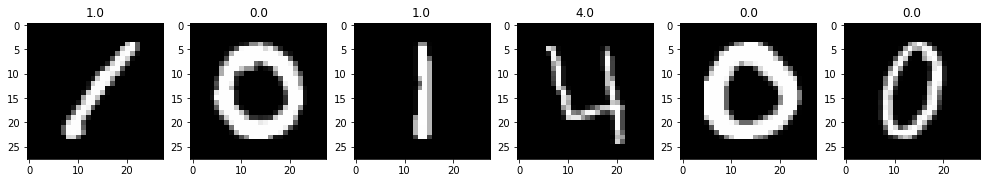

In [109]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:6], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray')
    subplot.set_title('%s' % train_label[i - 1])

In [84]:
train_label[6]

7.0

In [15]:
X = train_img.reshape(-1, 28*28).astype(np.float32)
Y = train_label

In [16]:
X_mean = X.mean(axis=0)
X -= X_mean
cov = np.dot(X.T, X) / X.shape[0]
U, S, _ = np.linalg.svd(cov)

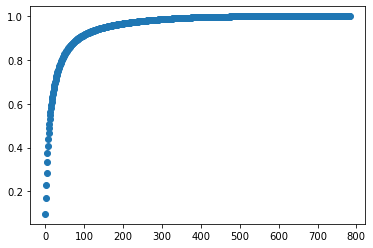

In [19]:
S_cumsum = np.cumsum(S) / np.sum(S)
plt.plot(S_cumsum, 'o')

In [35]:
S_thr = 0.90  # задаем порог для накопленной суммы собственных значений

# определяем необходимое число компонент для заданного порога
n_comp = np.argmax(np.where(S_cumsum > S_thr, 1, 0))

print('n_comp=%d S=%.3f' % (n_comp, S_cumsum[n_comp]))

n_comp=86 S=0.901


In [36]:
Xrot_reduced = np.dot(X, U[:, :n_comp])

In [37]:
Xrot_reduced.shape

(42000, 86)

In [38]:
Xrot_restored = np.dot(Xrot_reduced, U[:,:n_comp].T)

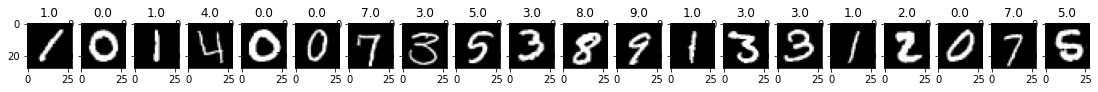

In [103]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(X[0:20], 1):
    subplot = fig.add_subplot(1, 21, i)
    img_ = img + X_mean
    plt.title('%s' % Y[i-1])
    plt.imshow(img_.reshape((28,28)), cmap='gray')

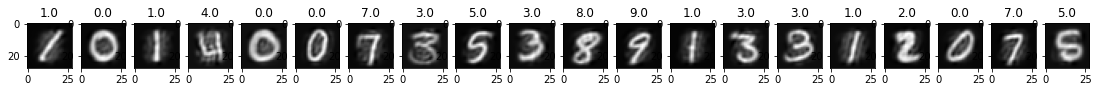

In [104]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(Xrot_restored[0:20], 1):
    subplot = fig.add_subplot(1, 21, i)
    img_ = img + X_mean
    plt.title('%s' % Y[i-1])
    plt.imshow(img_.reshape((28,28)) + X_mean.reshape((28,28)), cmap='gray')

Тренируем модель

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(Xrot_reduced, Y, test_size=0.3, random_state=44)
model = RandomForestClassifier(random_state=44)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=44)

In [56]:
model.score(X_test, Y_test)

0.9462698412698413

In [57]:
from sklearn.metrics import accuracy_score
pred_val = model.predict(X_test)
print('Accuracy: %s' % accuracy_score(Y_test, pred_val))

Accuracy: 0.9462698412698413


In [58]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred_val))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1238
         1.0       0.98      0.98      0.98      1419
         2.0       0.94      0.93      0.94      1249
         3.0       0.91      0.93      0.92      1305
         4.0       0.94      0.94      0.94      1251
         5.0       0.94      0.92      0.93      1141
         6.0       0.96      0.98      0.97      1219
         7.0       0.95      0.96      0.95      1283
         8.0       0.92      0.92      0.92      1218
         9.0       0.94      0.92      0.93      1277

    accuracy                           0.95     12600
   macro avg       0.95      0.95      0.95     12600
weighted avg       0.95      0.95      0.95     12600



Проверяем модель

In [71]:
Test_rot_reduced = np.dot(test, U[:, :n_comp])

In [72]:
pred_test = model.predict(Test_rot_reduced)

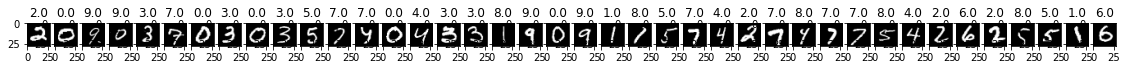

In [97]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:40], 1):
    subplot = fig.add_subplot(1, 41, i)
    plt.imshow(img, cmap='gray')
    subplot.set_title('%s' % pred_test[i - 1])

In [66]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test, 1):
        dst.write('%s,%s\n' % (i, p))

In [67]:
!head submit.txt


ImageId,Label
1,2.0
2,0.0
3,9.0
4,9.0
5,3.0
6,7.0
7,0.0
8,3.0
9,0.0
